## Pseudocode

### What is Pseudocode?
Pseudocode is a simplified and structured way to represent algorithms or solutions to problems without relying on the specific syntax of any programming language. It uses plain language and a logical structure to outline the steps in a program.

### Why Use Pseudocode?
1. **Organizing your thoughts/strategy** By thinking through the steps of a solution, you'll fine-tune your approach.
2. **Language Independence:** Pseudocode focuses on the *logic* of the algorithm rather than implementation details, making it accessible regardless of the programming language.
3. **Problem Decomposition:** It breaks a problem into smaller, manageable parts before coding, aiding in planning and understanding.
4. **Collaborative Understanding:** Since pseudocode is language-agnostic, it can be easily understood by both programmers and non-programmers.

---

### Example: Motion in a 2D Anharmonic Oscillator

**Problem:**  
Simulate the motion of a particle in a 2D anharmonic oscillator potential:  

$$
V(x, y) = \frac{1}{2}k(x^2 + y^2) + \alpha (x^4 + y^4)
$$

where \(k\) is the harmonic constant and $\alpha$ is the anharmonic constant.

---

### Example pseudocode for this problem:
1. **Define constants**: Harmonic constant ($k$), anharmonic constant ($\alpha$), mass ($m$), and time step ($\Delta t$).
2. **Initialize variables**:
   - Initial position ($x_0, y_0$).
   - Initial velocity ($v_{x0}, v_{y0}$).
3. **Set up a first-order system of equations** to feed into a differential equation solver:
   - Compute the force components using derivatives of the potential:
     $$
     F_x = -\frac{\partial V}{\partial x}, \quad F_y = -\frac{\partial V}{\partial y}
     $$
   - Define a function which takes in positions and velocities and outputs their time derivatives.
4. **Use a differential equation solver** to integrate the system over time:
   - Pass the function and initial conditions to the solver.
5. **Extract the results**:
   - Retrieve positions ($x, y$) at each time step.
6. **Plot the trajectory** of the particle in the 2D plane.
7. **Explore physics and test code** by adjusting parameters. (e.g. for $\alpha=0$ we have an analytical solution for comparison, which we could plot alongside the numerical results to evaluate accuracy. We could also superimpose the trajectories on a contour plot of the potential energy to test our understanding.)

---

### Key Takeaways:
1. The pseudocode above is **independent of programming language**. You could implement it in Python, C++, Java, or any other language with minor modifications.
2. By focusing on the *logic* of the algorithm, pseudocode ensures that the solution is robust and adaptable to any programming environment.
3. Translating this pseudocode into Python or any other language would involve writing loops, handling arrays, and using basic arithmetic operations.

---

In [2]:
# pseudocode for python
# import needed packages
# define constants
# derive system of equations (analytic or sympy, or both for comparison)
# define first-order system of equations as a custom function
# initialize positions and velocities
# solve with differential eqaution solver
# extract solution
# plot trajectories
# embed code in ipywidgets environment to explore physics and code

In [4]:
# expanded pseudocode for python

# import necessary packages
# e.g., numpy, matplotlib, scipy.integrate, ipywidgets

# define constants (k, alpha, m, delta_t or number of timesteps)

# derive system of equations
# e.g., analytical approach or use sympy to compute derivatives of the potential

# define first-order system of equations as a function
# Input: positions, velocities, time
# Output: time derivatives

# initialize positions, velocities, and time span

# solve the system using a differential equation solver
# e.g., scipy.integrate.solve_ivp

# extract the solution
# (positions and velocities over time)

# plot results:
# - trajectory (x, y) in 2D
# - contour plot of the potential energy with trajectory overlay
# - compare numerical trajectory with analytical solution (if applicable)

# embed in an ipywidgets environment
# add sliders for k, alpha, m, delta_t, etc., to explore parameter effects


# Write pseudocode for the following problem

On our second midterm and in the following classes, we explored the dynamics of anharmonic oscillators by numerically extracting the angular frequency as a function of the initial displacement of the oscillator, $Q_0$. Now that we have some experience with this sort of problem, we can apply the approach to other problems.

Write pseudocode and expanded pseudocode for extracting and plotting the angular frequency of an anharmonic oscillator with the potential energy 

$$U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6,$$
|
where $K$, $D$, and $\Phi$ are positive. 

How do you think changing the value of D will change the behavior? You may want to plot the potential and explore what happens as you change $D$ to help you think though a strategy.

/var/folders/s0/1f65lwpd7wn4wf4hfmb2pvx40000gn/T/ipykernel_31895/2055249855.py:40: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral1, _ = quad(period_integrand, left_bound, mid_point, args=(E, K, D, Phi), limit=100)
/var/folders/s0/1f65lwpd7wn4wf4hfmb2pvx40000gn/T/ipykernel_31895/2055249855.py:41: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularit

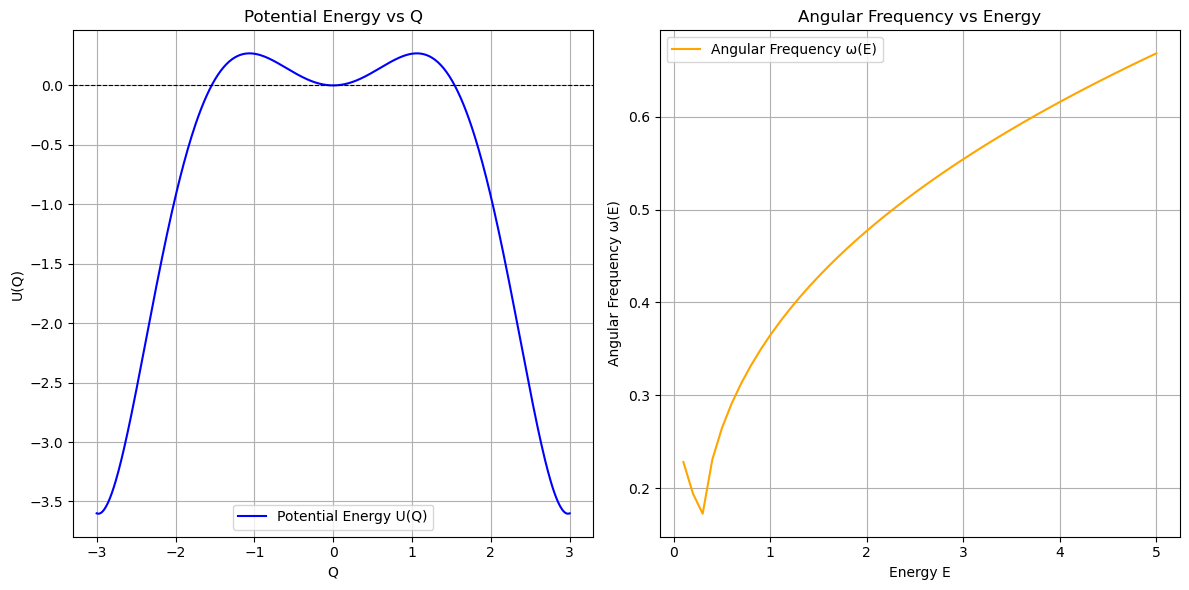

interactive(children=(FloatSlider(value=1.0, description='K', max=5.0, min=0.1), FloatSlider(value=1.0, descri…

<function __main__.plot_results(K, D, Phi)>

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec
from scipy.optimize import root_scalar
from ipywidgets import interact, FloatSlider, IntSlider

# Define the potential energy function
def potential(Q, K, D, Phi):
    return 0.5 * K * Q**2 - 0.25 * D * Q**4 + (1/6) * Phi * Q**6

def transformed_integrand(t, E, Q1, Q2, K, D, Phi):
    Q = Q1 + t * (Q2 - Q1)
    U = potential(Q, K, D, Phi)
    return (Q2 - Q1) / np.sqrt(2 * (E - U)) if E > U else 0


def compute_period(E, K, D, Phi, epsilon=1e-6):
    # Define the turning point equation
    def turning_point_eq(Q):
        return potential(Q, K, D, Phi) - E

    try:
        Q1 = root_scalar(turning_point_eq, bracket=[-10, 0]).root
        Q2 = root_scalar(turning_point_eq, bracket=[0, 10]).root
    except ValueError:
        # Return NaN if roots cannot be found
        return np.nan

    # Ensure bounds are properly initialized
    left_bound = Q1 + epsilon
    right_bound = Q2 - epsilon

    # Define the integrand
    def period_integrand(Q, E, K, D, Phi):
        U = potential(Q, K, D, Phi)
        return 1 / np.sqrt(2 * (E - U)) if E > U else 0

    # Split the integral
    mid_point = (left_bound + right_bound) / 2
    integral1, _ = quad(period_integrand, left_bound, mid_point, args=(E, K, D, Phi), limit=100)
    integral2, _ = quad(period_integrand, mid_point, right_bound, args=(E, K, D, Phi), limit=100)

    # Return full period
    return 4 * (integral1 + integral2)


# Compute angular frequency ω(E)
def compute_angular_frequency(E, K, D, Phi):
    T = compute_period(E, K, D, Phi)
    return 2 * np.pi / T if not np.isnan(T) else 0

# Main function to plot results
def plot_results(K, D, Phi):
    # Define Q and energy ranges
    Q = np.linspace(-3, 3, 500)
    E_vals = np.linspace(0.1, 5, 50)

    # Compute potential energy
    U = potential(Q, K, D, Phi)

    # Compute angular frequencies
    omega_vals = [compute_angular_frequency(E, K, D, Phi) for E in E_vals]

    # Plot potential energy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(Q, U, label="Potential Energy U(Q)", color="blue")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.title("Potential Energy vs Q")
    plt.xlabel("Q")
    plt.ylabel("U(Q)")
    plt.grid()
    plt.legend()

    # Plot angular frequency
    plt.subplot(1, 2, 2)
    plt.plot(E_vals, omega_vals, label="Angular Frequency ω(E)", color="orange")
    plt.title("Angular Frequency vs Energy")
    plt.xlabel("Energy E")
    plt.ylabel("Angular Frequency ω(E)")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define parameters and call the function
K = 1.0
D = 1.0
Phi = 0.1
plot_results(K, D, Phi)

# Interactive exploration with sliders
interact(
    plot_results,
    K=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
    D=FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0),
    Phi=FloatSlider(min=0.01, max=1.0, step=0.01, value=.25),
)

When *D* is increasing the potential becomes shallower for higher values of *Q* and the angular frequency decreases.

When *D* is decreasing the potential becomes steeper and the angular frequency should increase.